In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler


# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")


Davies-Bouldin Index: 1.1952418509697749


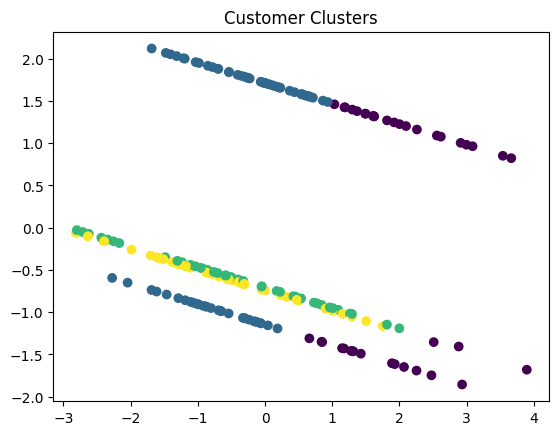

In [2]:
# Preprocess data
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "Category": lambda x: x.mode()[0]  # Most frequent category
}).reset_index()

# Encode categorical variables
customer_features = pd.get_dummies(customer_features, columns=["Category"])

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])

# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Calculate DB Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap="viridis")
plt.title("Customer Clusters")
plt.show()

In [4]:
#clustering metrics
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40991049184038697


In [5]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(scaled_features, clusters)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 83.75374829694545
